# Roomba Simulation

In [250]:
import agentpy as ap
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

## Constants

In [251]:
# Dirt Constants
CLEAN = 0
DIRTY = 1

# Direction Constants
STATIC = [0,0]
UP = [0,1]
DOWN = [0,-1]
LEFT = [-1, 0]
RIGHT = [1,0]
UP_LEFT = [-1,-1]
DOWN_LEFT = [-1,-1]
UP_RIGHT = [1,1]
DOWN_RIGHT = [1,-1]

## Plotter Function

In [252]:
# Creates a Plot from a user defined Data
def plot(title, data):
    """
    :pram str title: Title of the plot
    :pram any data: Data that its going to be plot
    """
    
    cmap = colors.ListedColormap(['White','Sienna']) #Sets up the colour palette of the plot
    plt.figure(figsize=(6,6)) # Specify the size of the plot
    plt.title(title) # Sets the title of the plot based on the parameter title from the function plot
    plt.pcolor(data[::-1],cmap=cmap, edgecolors='k', linewidths=3) # Populates the plot with the data based on the parameter data from the function plot
    plt.xticks([]) # Deletes the labels in X axis
    plt.yticks([]) # Deletes the labels in Y axis
    plt.show() # Prints the Plot

## Model definition

In [253]:
# Defines a Roomba Agent that its going to be our vaccum robot
class RoombaAgent(ap.Agent):
    def setup(self):
        self.position = [1,1] # Set initial position
        self.moves = 0 # Step Counter

    def move(self):
        directions = [ UP, DOWN, LEFT, RIGHT, UP_LEFT, DOWN_LEFT, UP_RIGHT, DOWN_RIGHT ] # Set Posible Movements
        random_direction = random.choice(directions) # Get a random direction for step
        new_position = [self.position[0] + random_direction[0], self.position[1] + random_direction[1]] # Calculate new position adding the new coordinates from random_direction
        if(all(-1 < i <= self.model.grid_size[x]-1 for x, i in enumerate(new_position))): # Checks if for every coordinate from new_positions its a valid coordinate
            self.position = new_position # Replaces old position from new position
            self.moves+=1 # Register a step


In [254]:
# Variable that stores data from the simulation
manual_results = {}

class RoombaModel(ap.Model):
    def setup(self):
        self.grid_size = self.p.grid_size # Stores the size of the map based on the grid_size parameter
        self.agents = ap.AgentList(self, self.p.agents, RoombaAgent) # Creates an AgentList based on the RoombaAgents, uses the agents parameter to set the number of agents created
        self.dirty_cells = np.random.choice([CLEAN,DIRTY], self.grid_size, p=[1-self.p.dirty_percentage, self.p.dirty_percentage]) # Creates a random matrix with the size of the map that has the information about which cell its clean or dirty

    def step(self):
        cleaned_cells = 0 # Creates variable of the ammount of cleaned cells in that step
        for agent in self.agents: # Iterates over all created agents
            if(self.dirty_cells[tuple(agent.position)]): # Check if the agent position its clean or dirty
                self.dirty_cells[tuple(agent.position)] = CLEAN # If its dirty, change the value of the cell to CLEAN
                cleaned_cells+=1 # Augment the counter of cleaned cells in the step
            agent.move() # Moves the agent to a new position
        self.record("Time-Series", cleaned_cells) # Saves the counter: cleaned_cells to a table clalled Time-Series

    def end(self):
        cleaned_cells = np.count_nonzero(self.dirty_cells == CLEAN) # Counts all the cleaned cells and sets that value to a veriable
        percentage_cleaned = cleaned_cells / np.prod(self.grid_size) * 100 # Check which percentage oc the cells are clean
        total_moves = sum(agent.moves for agent in self.agents) # Make the sums of all the movements of the agents and sets that to a variable
        manual_results["dirty_cells"] = self.dirty_cells # Save the dirty_cells variable to manual results
        manual_results["cleaned_cells"] = cleaned_cells # Save the cleaned_cells variable to manual results
        manual_results["percentage_cleaned"] = percentage_cleaned # Save the percentage_cleaned variable to manual results
        manual_results["total_moves"] = total_moves # Save the total_moves variable to manual results

## Simulation run

In [255]:
parameters = {
    "agents": 5, # Defines the number of agents
    "grid_size": [5,5], # Defines the size of the map
    "dirty_percentage": 1, # Percentage of dirty cells | 0 -> 1
    "max_steps": 100 # Max simulation Time
}

In [256]:
model = RoombaModel(parameters) # Initializes the RoombaModel
results = model.run(steps=parameters['max_steps']) # Runs the simulation

Completed: 100 steps
Run time: 0:00:00.002998
Simulation finished


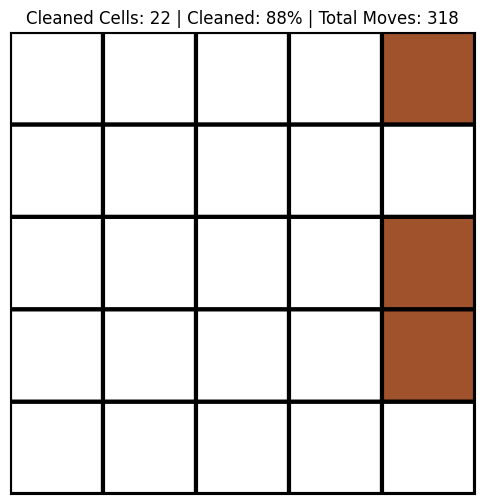

In [257]:
plot(f"Cleaned Cells: {manual_results['cleaned_cells']} | Cleaned: {round(manual_results['percentage_cleaned'])}% | Total Moves: {manual_results['total_moves']}", manual_results["dirty_cells"]) # Plots the result of the simulation in a board form

In [258]:
results.variables.RoombaModel.head() # Prints the table of the Time-Series Record

,Time-Series
t,
1,1
2,4
3,1
4,1
5,1


<Axes: xlabel='t'>

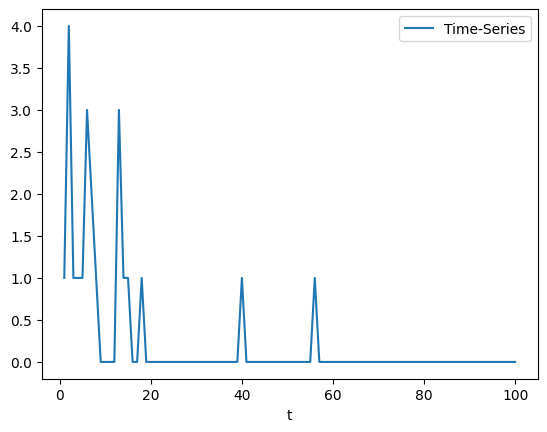

In [260]:
results.variables.RoombaModel.plot() # Plots the Time-Series Values